# DATA SCIENCE PROJECT ON DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS
## BUSINESS CASE: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE LATE DELIVERY

### DATA PRE-PROCESSING , FEATURE SELECTION , MODEL CREATION & EVALUATION SUMMARY:

#### DATA PRE-PROCESSING SUMMARY:
* Check Missing Value.
* Check duplicates.
* Convert categorical to numerical.
* Check outliers & Impute outliers.
* Feature transformation.
* Feature scaling.

#### FEATURE SELECTION SUMMARY:
* Drop unique & Constant Column.
* Check correlation with heatmap & Remove highly correlated feature.

#### MODEL CREATION & EVALUATION SUMMARY:
* Define dependant & independant features.
* Split training and testing data.
* Model creation, prediction & evaluation.
* Model saving.

## Importing Libraries

In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Insights:
We are importing essential Python libraries - Pandas for data manipulation, NumPy for numerical operations, and Matplotlib/Seaborn for data visualization and set up the notebook to display Matplotlib plots inline. Additionally, we suppress warnings using the 'warnings' library.

### Importing RAW Data

In [2]:
df = pd.read_csv('C:/Users/user/Downloads/GEMS PROJECT/data/raw/DataCoSupplyChainDataset.csv', encoding='latin1')
pd.set_option('display.max_columns',None) # Used to display the all features

In [3]:
df.describe(exclude='O').T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [4]:
df.describe(include='O').T

,count,unique,top,freq
Type,180519,4,DEBIT,69295
Delivery Status,180519,4,Late delivery,98977
Category Name,180519,50,Cleats,24551
Customer City,180519,563,Caguas,66770
Customer Country,180519,2,EE. UU.,111146
Customer Email,180519,1,XXXXXXXXX,180519
Customer Fname,180519,782,Mary,65150
Customer Lname,180511,1109,Smith,64104
Customer Password,180519,1,XXXXXXXXX,180519
Customer Segment,180519,3,Consumer,93504


In [5]:
df.shape #number of observations and attributes  

(180519, 53)

In [6]:
df.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.640015,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## Data Cleaning

In [8]:
df.isnull().sum().sort_values(ascending=False) # To find out Null values 

Product Description              180519
Order Zipcode                    155679
Customer Lname                        8
Customer Zipcode                      3
Type                                  0
Order Profit Per Order                0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Region                          0
order date (DateOrders)               0
Order State                           0
Order Status                          0
Product Card Id                       0
Product Category Id                   0
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0


### Insights:
1.There are null values in customer_lname, order_zipcode columns.\
2.We have to delete column's product_status as it has constant value, product_description as it is an empty column and customer_zipcode has more than half null values.

In [9]:
# Handling null values
df['Customer Lname']=df['Customer Lname'].fillna("Not Determined")
df['Order Zipcode']=df['Order Zipcode'].fillna(0)

In [10]:
df.drop(['Product Status','Product Description','Customer Zipcode'],axis=1,inplace=True)

In [11]:
df.isnull().values.any() # To find out Null values 

False

### Insight:
We have handled all the null values and deleted columns.

In [13]:
df.duplicated().sum() # Checking duplicates

0

### Insight:
Their is no Duplicates is present in data.

In [14]:
unique_value_counts = df.nunique() # unique values from each column

indices_of_unique_values = unique_value_counts[unique_value_counts < 2].index 
print(indices_of_unique_values) # Filtering number of unique values columns less than 2

df.drop(indices_of_unique_values, axis=1,inplace=True)

Index(['Customer Email', 'Customer Password'], dtype='object')


### Insights:
We drop columns Customer Email, Customer Password as they have less than 2 unique values as they give no information for our models.

In [15]:
# Dropping irrelevant columns
df.drop(['Category Id','Customer Fname', 'Customer Id', 'Customer Lname',
 'Department Id','Order Customer Id','Order Id',
'Order Item Cardprod Id','Order Item Id','Product Card Id',
'Product Category Id','Product Image',"Customer Country", "Customer State", "Customer Street"],axis=1,inplace=True)

### Insights:
We have dropped irrelevant columns.

## HEATMAP

Using Correlation Heatmap:
- A heatmap that visualizes the correlation between numerical variables.
- Helps identify strong and weak correlations.

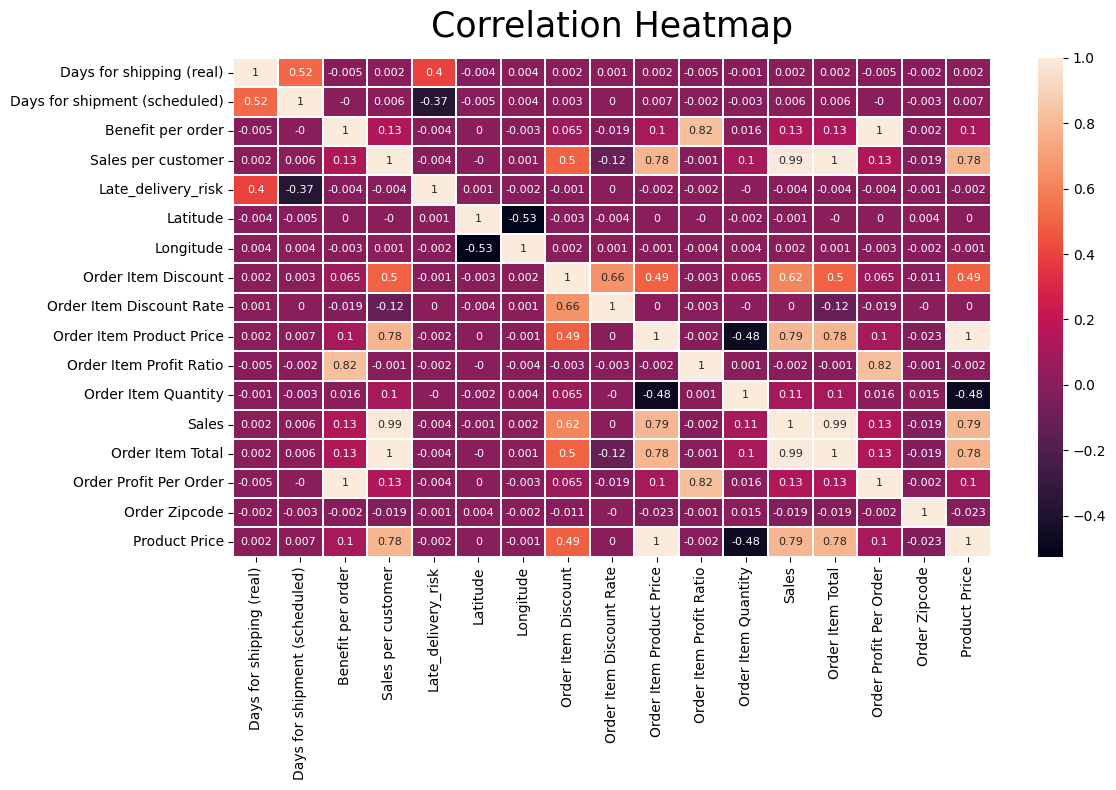

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(df.select_dtypes(include=['float64', 'int64']).corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})# annot=display inside values, linewidth=seperation line, annot_kws=value font size
plt.title('Correlation Heatmap', size= 25, pad=15) # pad - 15 points distance from top 
plt.tight_layout()

plt.savefig(r'C:\Users\user\Downloads\GEMS PROJECT\src\models\heatmap_snapshot.png', dpi=300)# Save the heatmap as an image
plt.show()

In [17]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr() # pairwise correlation

unique_corr_pairs = corr_matrix.mask(np.triu(np.ones(corr_matrix.shape)).astype(bool)).unstack() # flatten upper triangle to get unique pairs

unique_corr_pairs.sort_values(ascending=False).head(10)

Sales per customer        Order Item Total           1.000000
Order Item Product Price  Product Price              1.000000
Benefit per order         Order Profit Per Order     1.000000
Sales                     Order Item Total           0.989744
Sales per customer        Sales                      0.989744
Benefit per order         Order Item Profit Ratio    0.823689
Order Item Profit Ratio   Order Profit Per Order     0.823689
Order Item Product Price  Sales                      0.789948
Sales                     Product Price              0.789948
Order Item Product Price  Order Item Total           0.781781
dtype: float64

In [18]:
drop_corr = unique_corr_pairs[unique_corr_pairs > 0.85].index.get_level_values(0).tolist()# get_level_value=to retrieve the feature columns names
print(drop_corr) # 0 will get the column names at first level

df.drop(drop_corr, axis=1, inplace=True)

['Benefit per order', 'Sales per customer', 'Sales per customer', 'Order Item Product Price', 'Sales']


### Insights:
We have deleted one of the attributes from pair having correlation > 0.85 as it gives similar information in the dataset.

#### Changing the data type of  object attributes to categorical( because object can hold all kinds of data types) 

In [21]:
columns_to_convert = ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Segment',
               'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region',
               'Order State', 'Order Status', 'Product Name','Shipping Mode']

for column in columns_to_convert:
    df[column] = df[column].astype('category')

### Insights:
The specified columns in the DataFrame will be converted to the categorical data type.\
Categorical data types can reduce memory usage and improve performance for certain operations.

#### Change date attributes to datetime.

In [22]:
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"])#if it does'nt work use ,infer_datetime_format=True)
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])

In [24]:
df["ship_year"]= df["shipping date (DateOrders)"].dt.year
df["ship_month"]= df["shipping date (DateOrders)"].dt.month
df["ship_day"]= df["shipping date (DateOrders)"].dt.day
df["ship_hour"]= df["shipping date (DateOrders)"].dt.hour

df.drop(["shipping date (DateOrders)"], axis = 1, inplace= True)

In [25]:
df["order_year"]= df["order date (DateOrders)"].dt.year
df["order_month"]= df["order date (DateOrders)"].dt.month
df["order_day"]= df["order date (DateOrders)"].dt.day
df["order_hour"]= df["order date (DateOrders)"].dt.hour

df.drop(["order date (DateOrders)"], axis = 1, inplace= True)

# SAVE PRE-PROCESS DATA

In [29]:
df.to_csv('preprocessing.csv')

## CHECKING  FOR OUTLIERS:
Using Box plots & Histogram plots
- They are used to show distributions of numeric data values as well as it helps to detect the outliers.

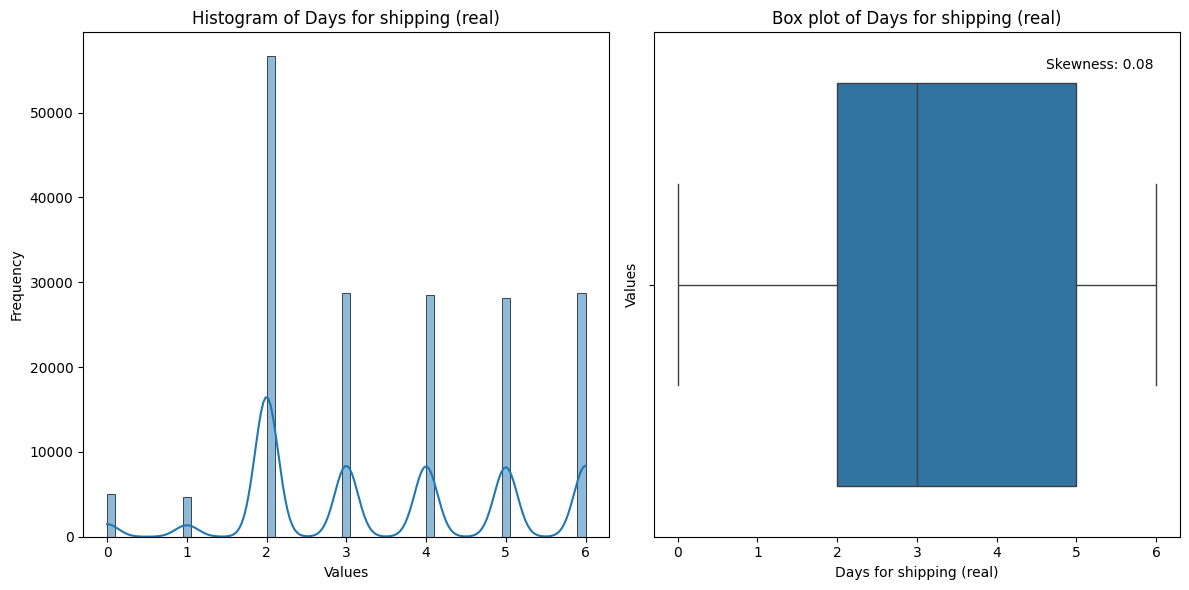

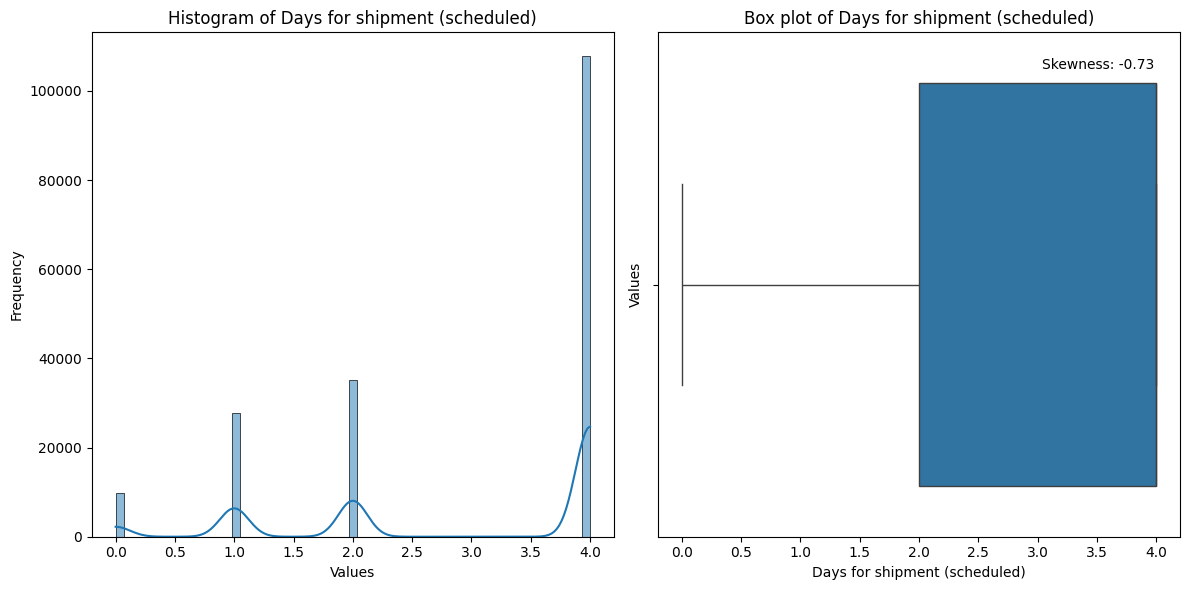

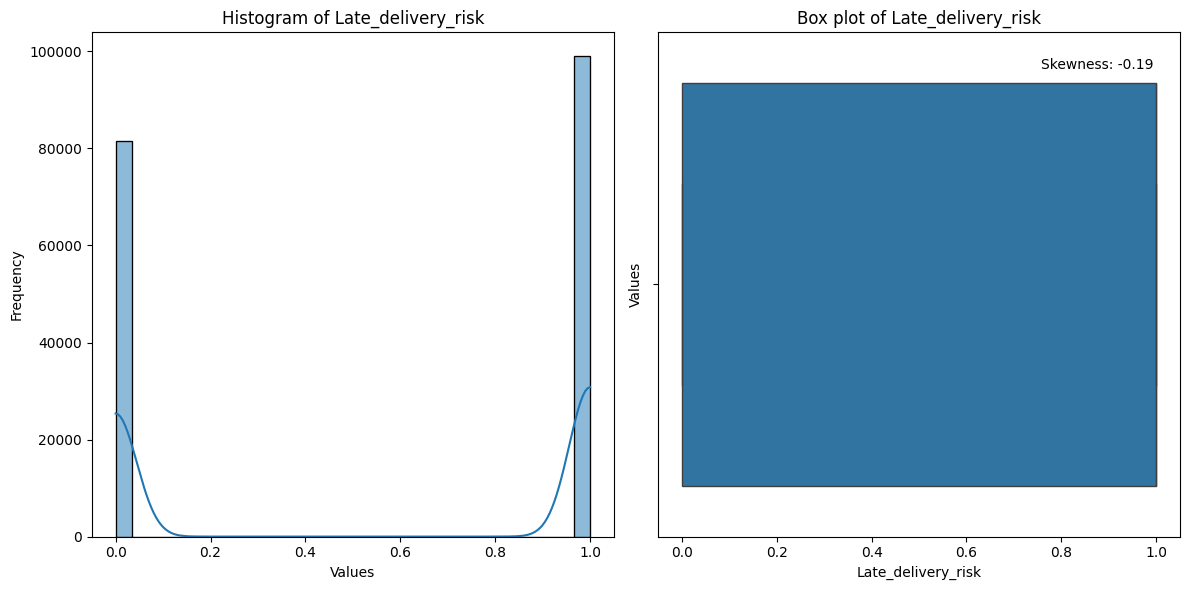

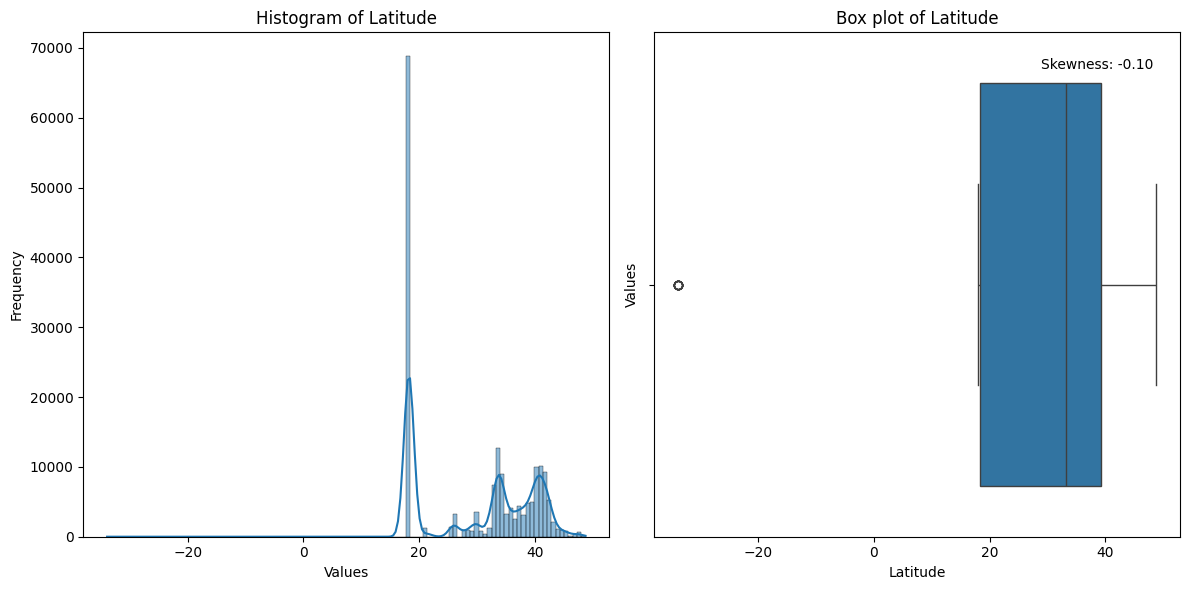

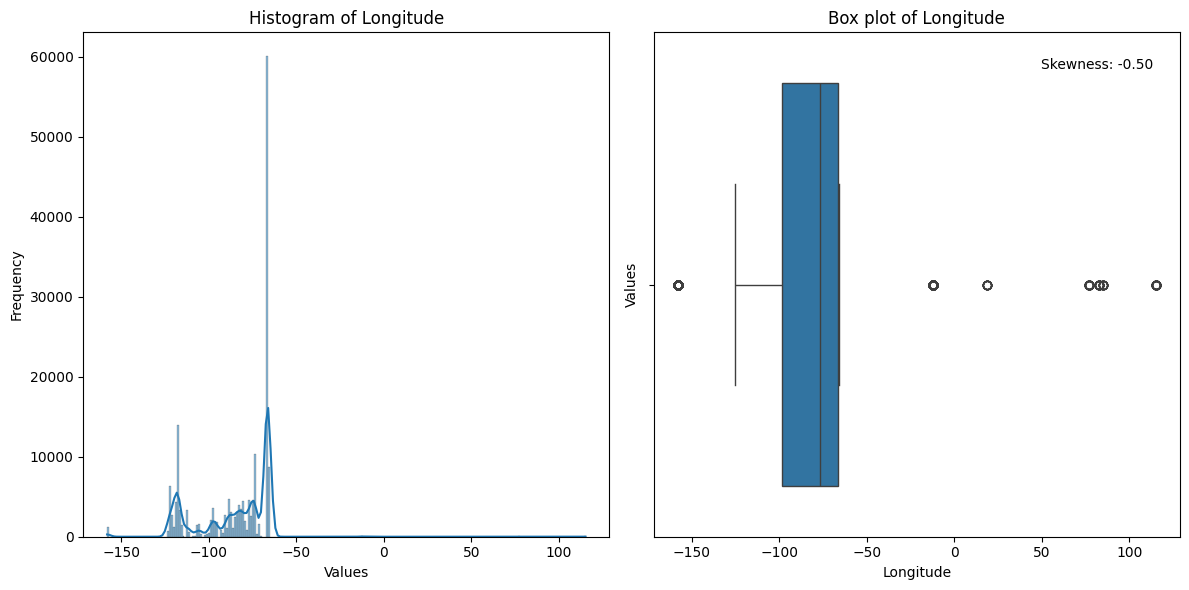

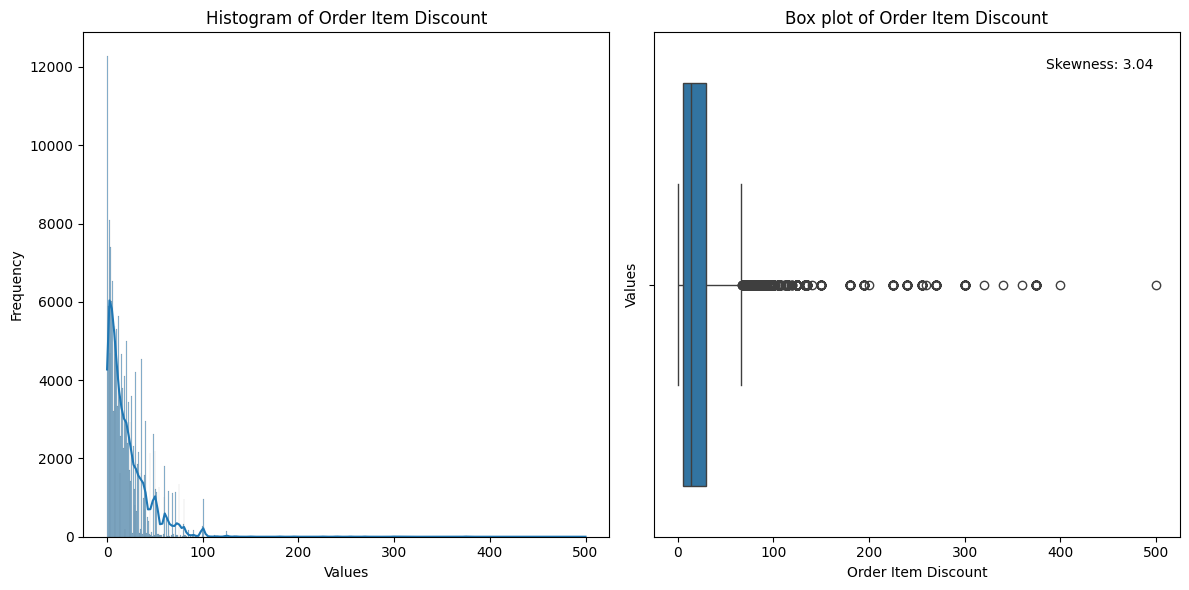

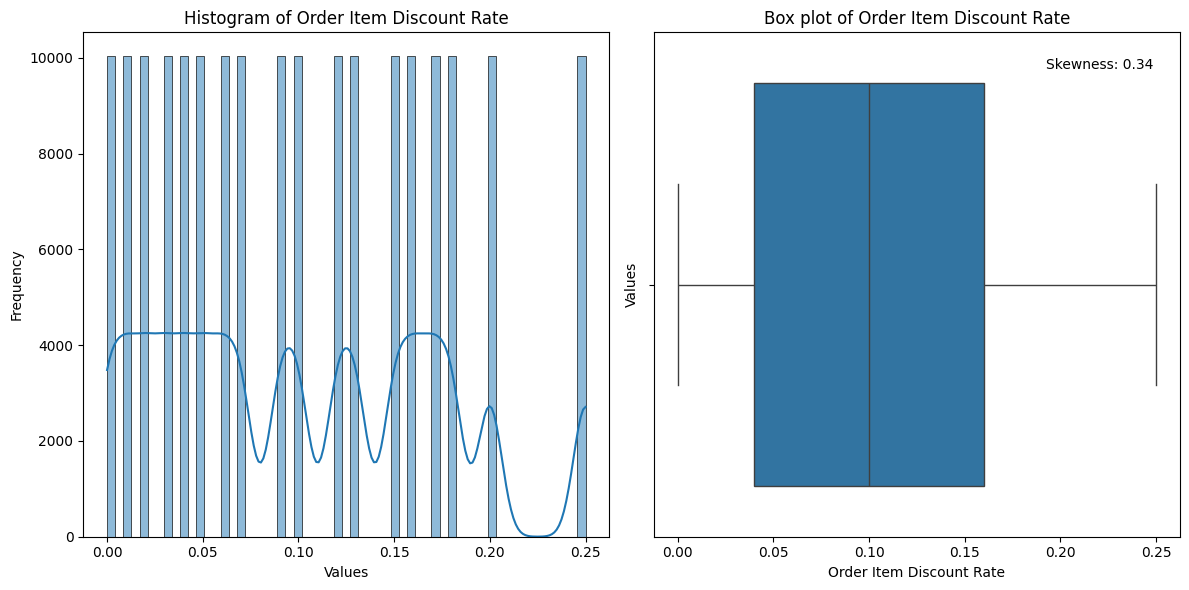

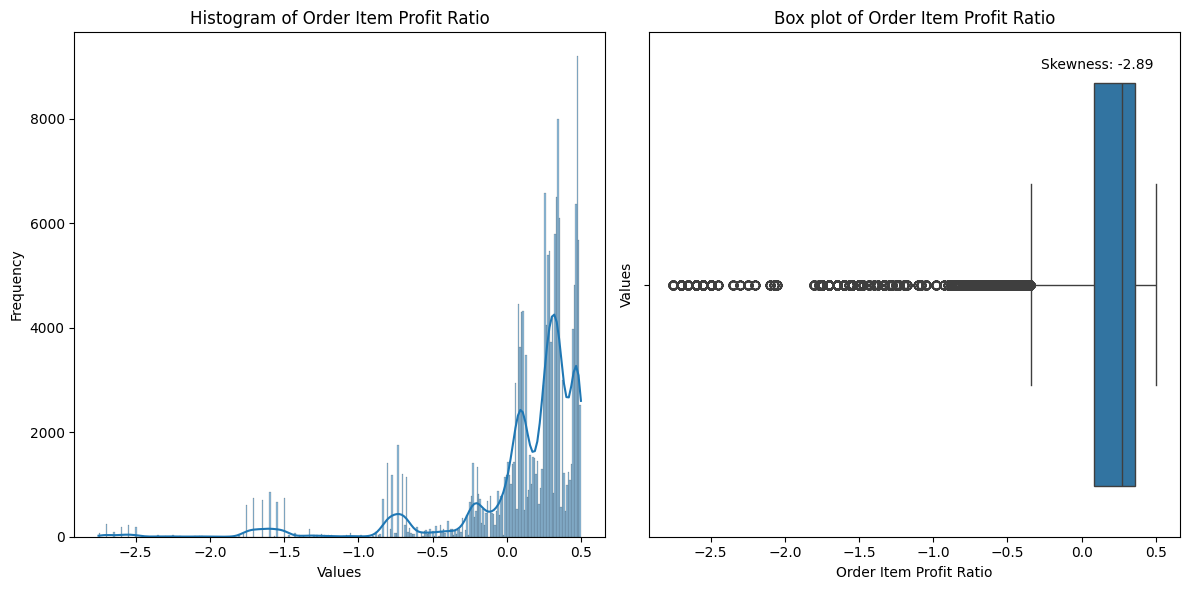

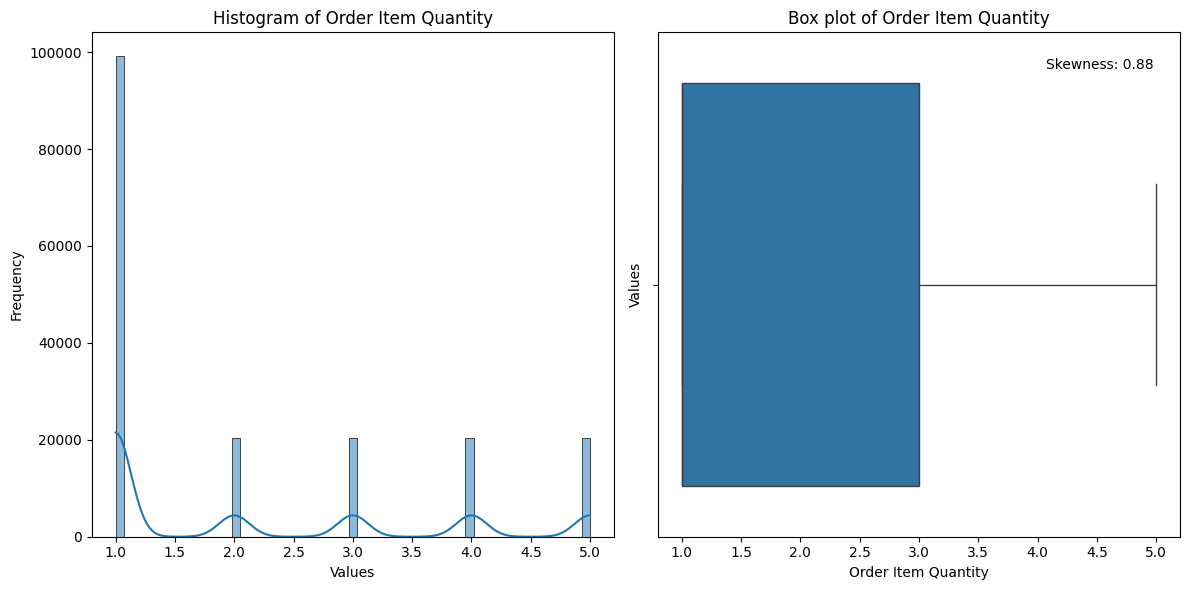

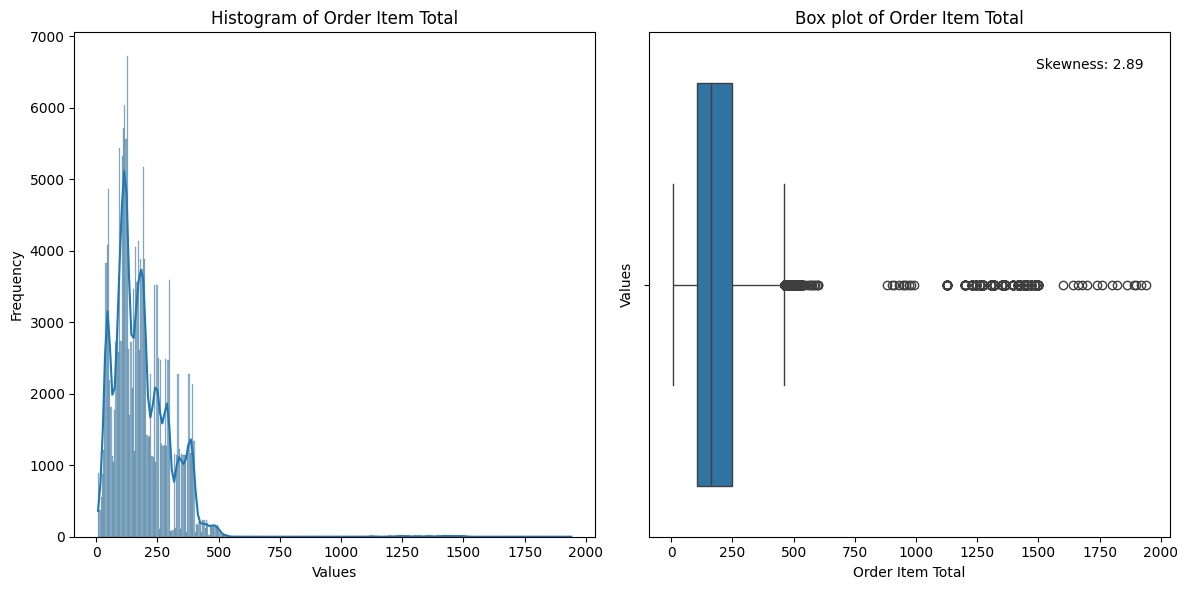

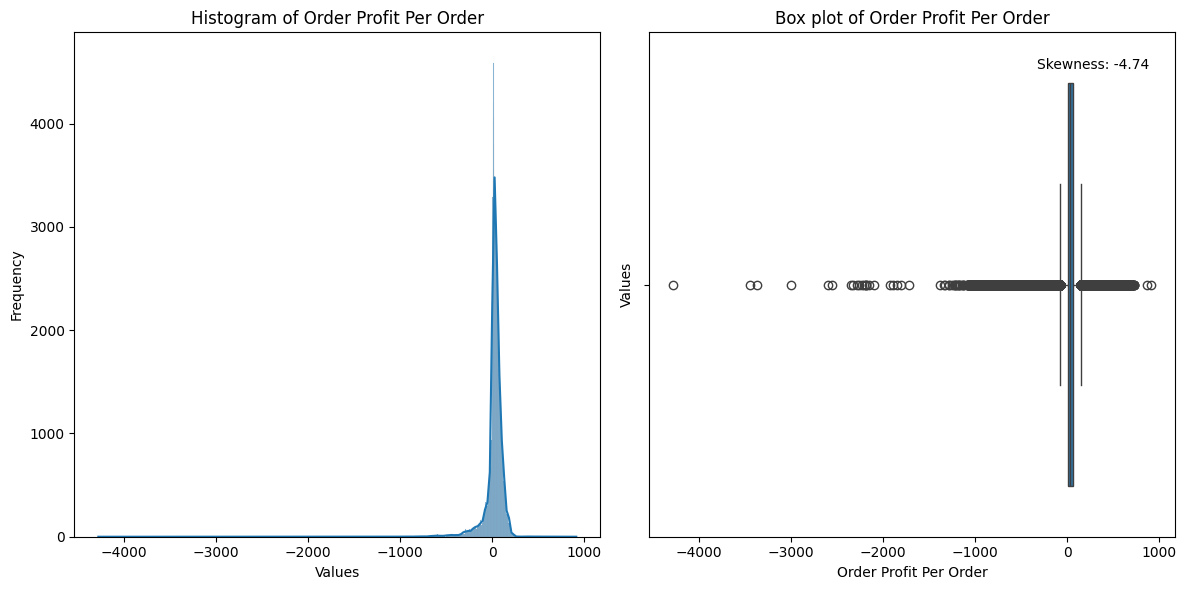

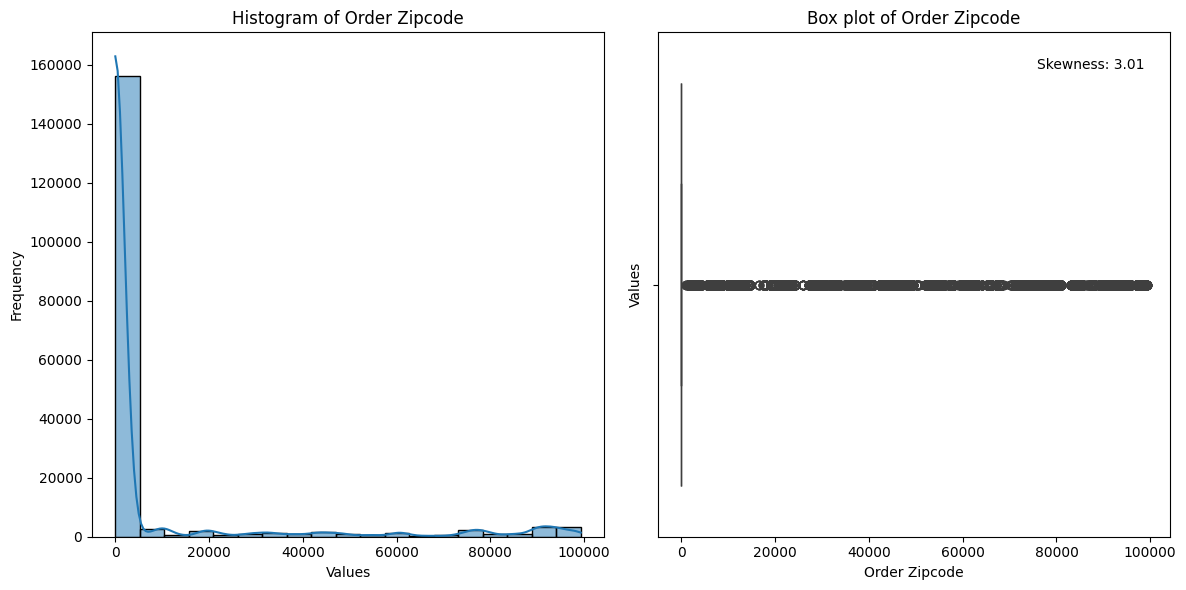

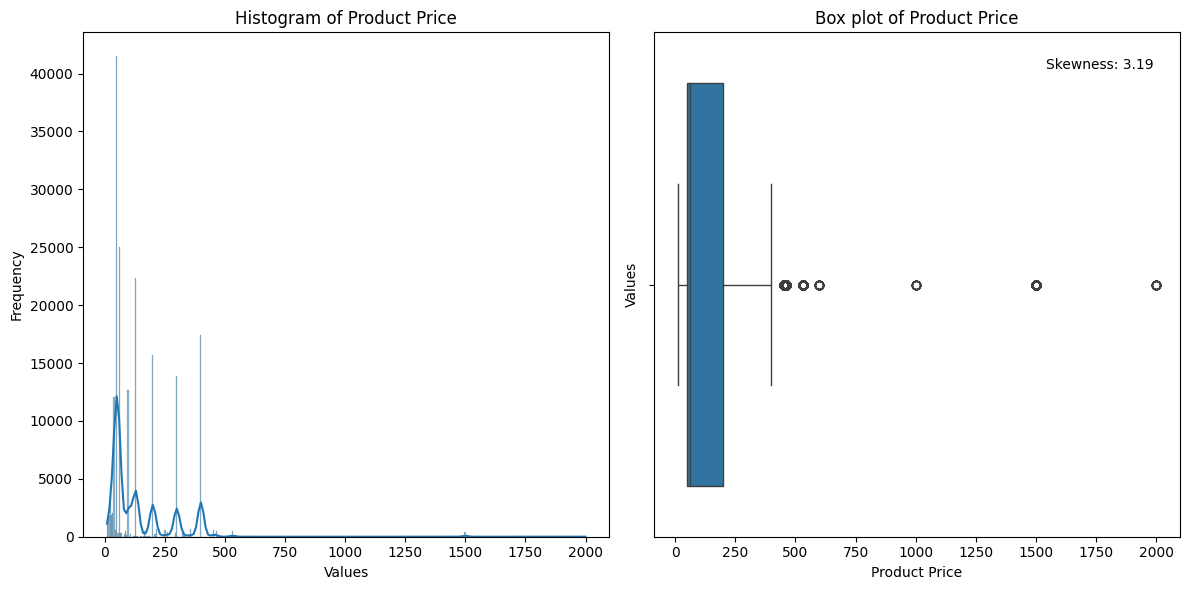

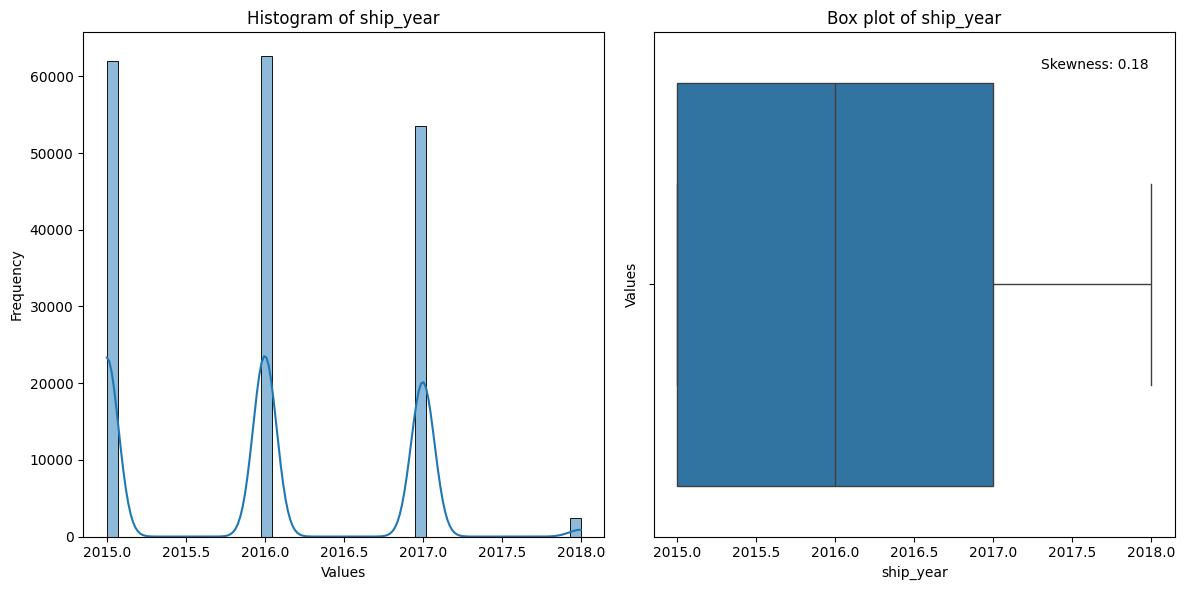

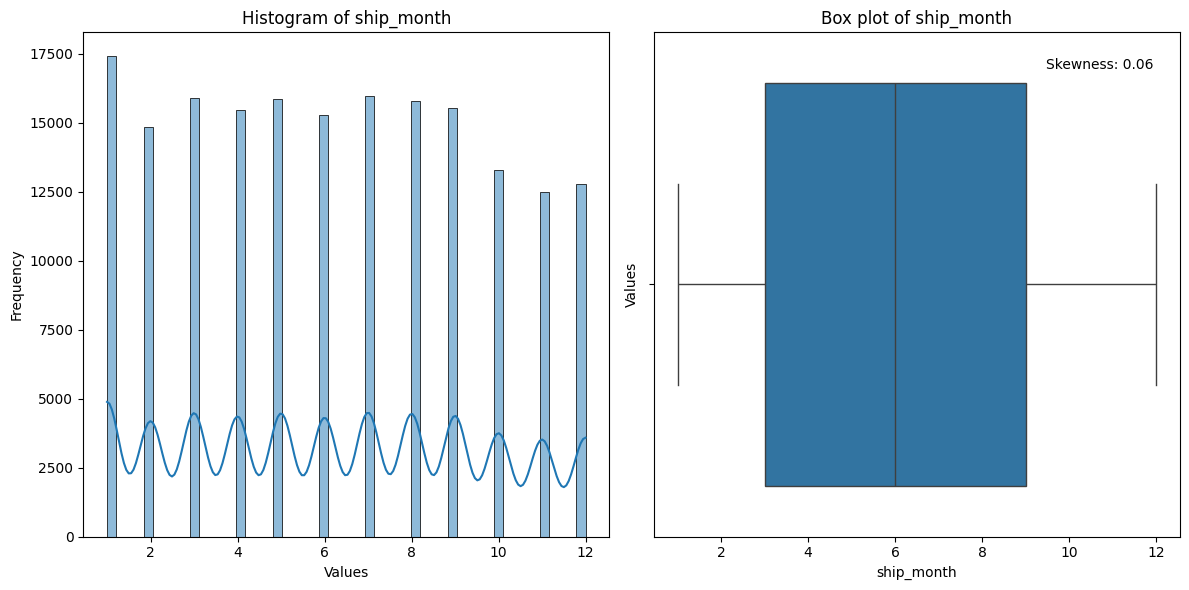

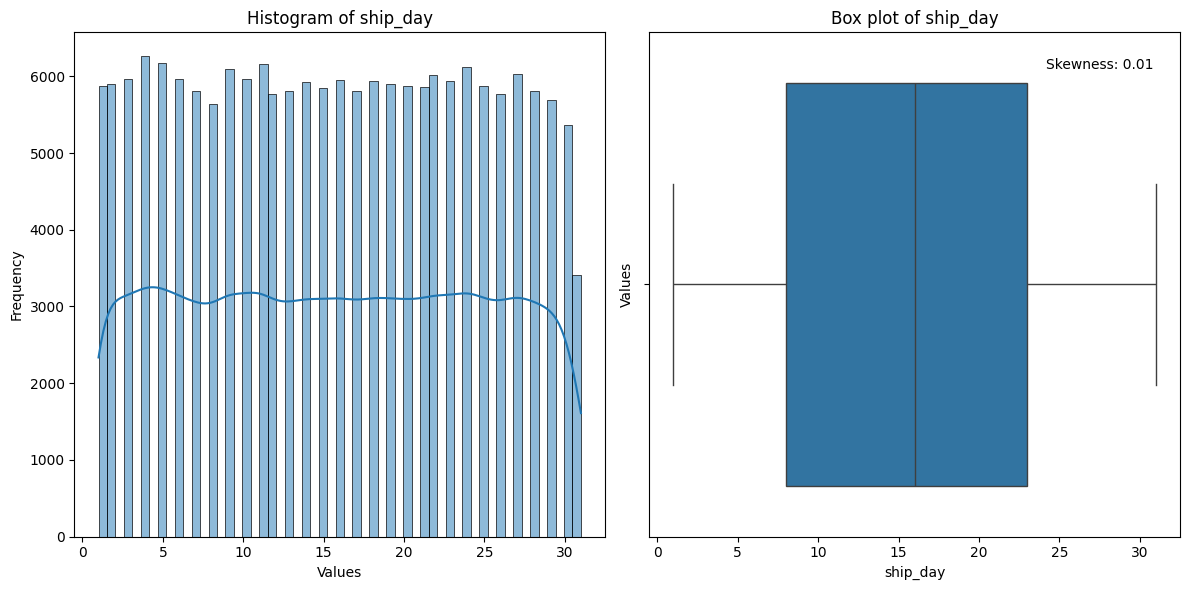

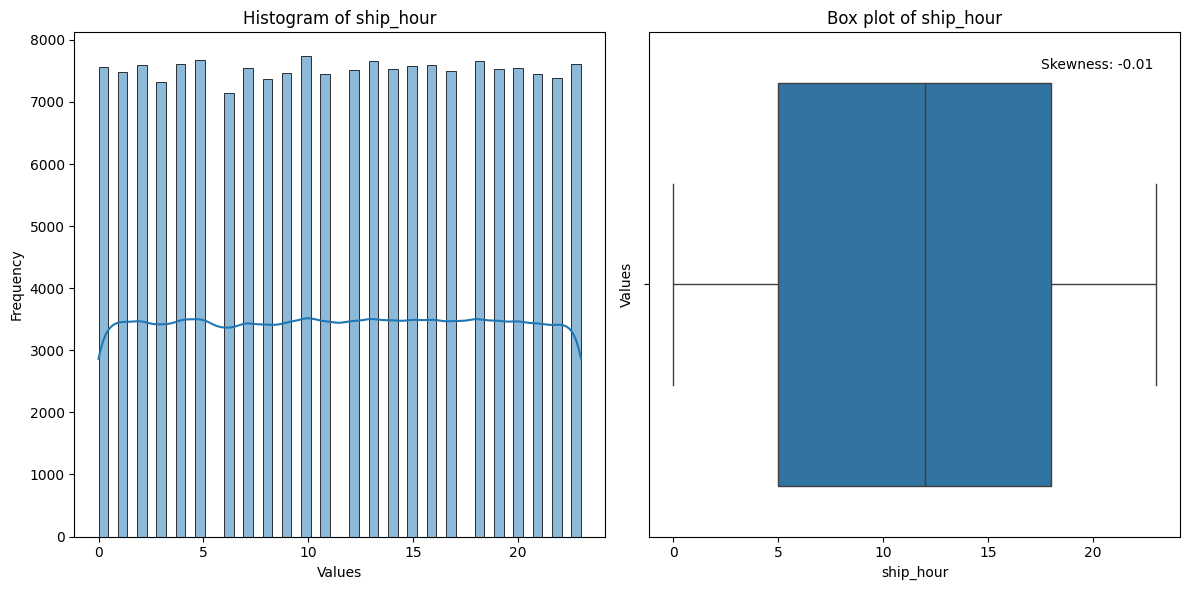

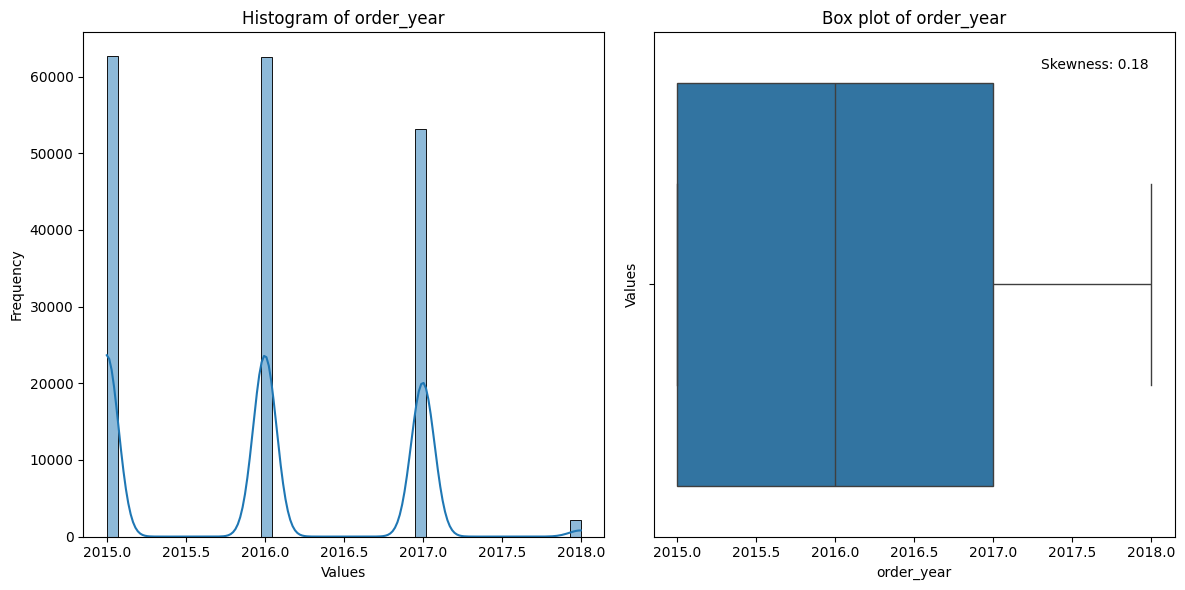

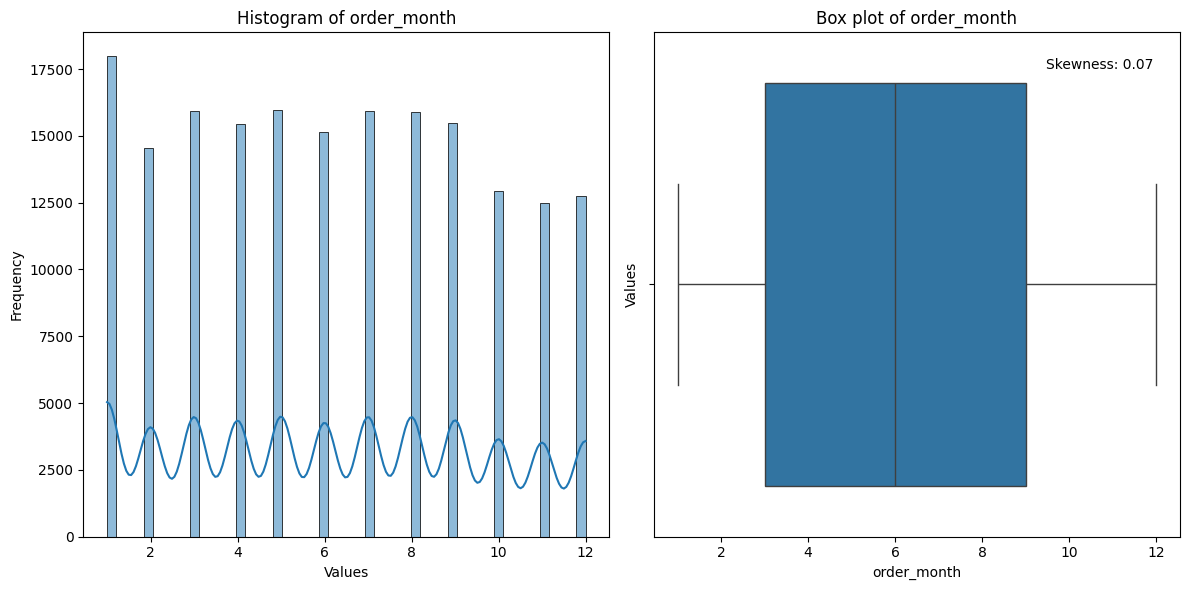

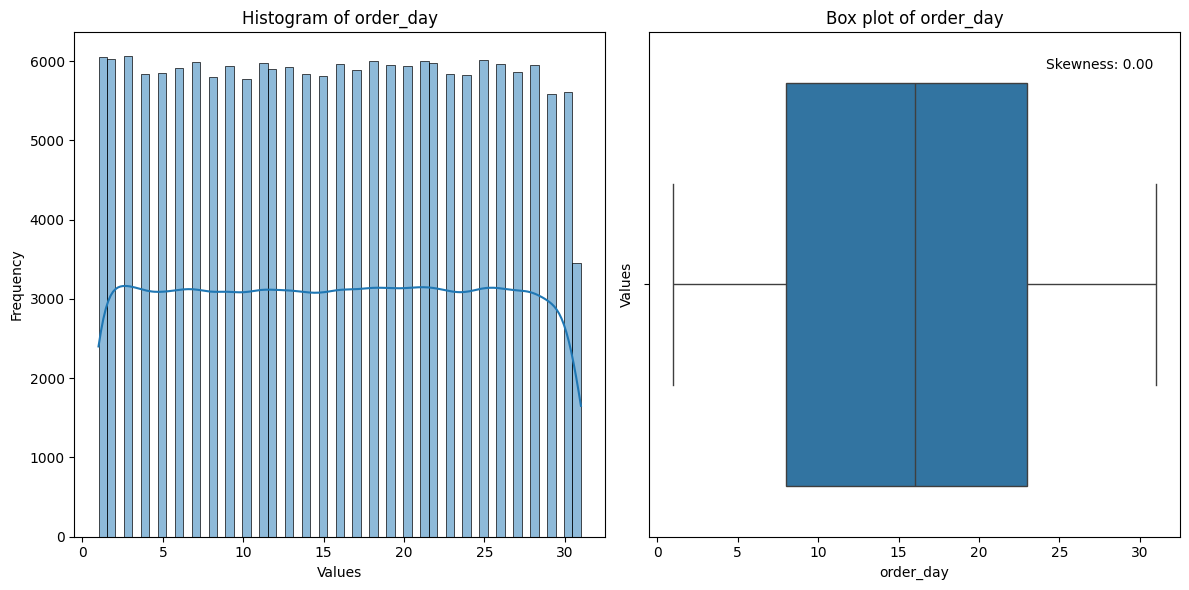

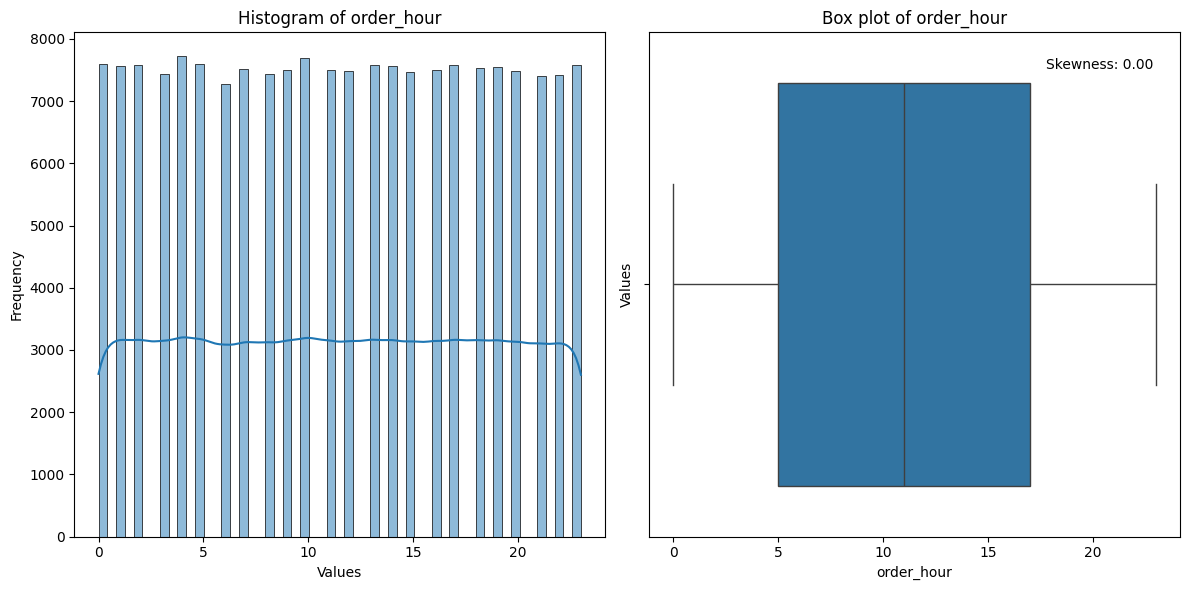

In [34]:
for column in df.select_dtypes(exclude=['object', 'category']):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[column], kde=True) # Plotting histogram
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
        
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], orient='v') # Plotting boxplot
    plt.title(f'Box plot of {column}')
    plt.ylabel('Values')
    
    skewness = df[column].skew() # Calculating skewness to display
    plt.text(0.95, 0.95, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [35]:
skewness_values = {}
for column in df.select_dtypes(exclude=['object', 'category']):
    skewness = df[column].skew()
    skewness_values[column] = skewness

for column, skewness in skewness_values.items():
    print(f"{column}: Skewness = {skewness:.2f}")

Days for shipping (real): Skewness = 0.08
Days for shipment (scheduled): Skewness = -0.73
Late_delivery_risk: Skewness = -0.19
Latitude: Skewness = -0.10
Longitude: Skewness = -0.50
Order Item Discount: Skewness = 3.04
Order Item Discount Rate: Skewness = 0.34
Order Item Profit Ratio: Skewness = -2.89
Order Item Quantity: Skewness = 0.88
Order Item Total: Skewness = 2.89
Order Profit Per Order: Skewness = -4.74
Order Zipcode: Skewness = 3.01
Product Price: Skewness = 3.19
ship_year: Skewness = 0.18
ship_month: Skewness = 0.06
ship_day: Skewness = 0.01
ship_hour: Skewness = -0.01
order_year: Skewness = 0.18
order_month: Skewness = 0.07
order_day: Skewness = 0.00
order_hour: Skewness = 0.00


## HANDLING OUTLIERS:
Using WINSORIZE method
- Winsorization is a method used to handle outliers by capping or truncating extreme values in a dataset. Instead of removing outliers, Winsorization modifies their values to be closer to the rest of the data.

In [37]:
from scipy.stats.mstats import winsorize

outlier_columns = [
    "Order Item Discount",
    "Order Item Profit Ratio",
    "Order Item Quantity",
    "Order Item Total",
    "Order Profit Per Order",
    "Order Zipcode",
    "Product Price"
]

for column in outlier_columns:
    
    df[column] = winsorize(df[column], limits=[0.05, 0.05])

### Insights:
The outliers are handled.

In [39]:
numdf= df.select_dtypes(exclude="category") #  Numerical Data
numdf.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Late_delivery_risk', 'Latitude', 'Longitude', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Order Item Total', 'Order Profit Per Order',
       'Order Zipcode', 'Product Price', 'ship_year', 'ship_month', 'ship_day',
       'ship_hour', 'order_year', 'order_month', 'order_day', 'order_hour'],
      dtype='object')

In [40]:
df['Late_delivery_risk'].value_counts() #check for unbalanced data

Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

## Model Creation

In [41]:
X= numdf.drop(["Late_delivery_risk"], axis= 1) 
y= numdf["Late_delivery_risk"]

### Insight:
Our Target attribute is Late_delivery_risk

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## SCALING 
Scaling is used to bring entire data into a certain scale by reducing variation.
- Using Standardization technique : StandardScaler by subtracting the mean and dividing by the standard deviation of that feature.

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Insights:
As this is a vast dataset, if we scale before train-test split data leak may occur.

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42) # Creating logistic regression model

logreg.fit(X_train, y_train)# Training the model on the training data

y_pred = logreg.predict(X_test) # Predicting the target variable for the test data

In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20396
           1       0.96      1.00      0.98     24734

    accuracy                           0.98     45130
   macro avg       0.98      0.97      0.98     45130
weighted avg       0.98      0.98      0.98     45130



In [53]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(), # Initializing models
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),  
    "XGBoost": XGBClassifier()     
}

for name, model in models.items():
    print(f"Training {name}...") # Train each model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:\n{report}\n")

Training Logistic Regression...
Accuracy of Logistic Regression: 0.98
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20396
           1       0.96      1.00      0.98     24734

    accuracy                           0.98     45130
   macro avg       0.98      0.97      0.98     45130
weighted avg       0.98      0.98      0.98     45130


Training Decision Tree...
Accuracy of Decision Tree: 0.97
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     20396
           1       0.98      0.97      0.98     24734

    accuracy                           0.97     45130
   macro avg       0.97      0.97      0.97     45130
weighted avg       0.97      0.97      0.97     45130


Training Random Forest...
Accuracy of Random Forest: 0.98
Classification Report of Random Forest:
              precision    recal

In [6]:
num = {'Model': ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
       'Score': [0.95, 0.98, 0.97, 0.98, 0.98]}
pd.DataFrame(num)

,Model,Score
0,Naive Bayes,0.95
1,Logistic Regression,0.98
2,Decision Tree,0.97
3,Random Forest,0.98
4,XGBoost,0.98


- Logistic Regression achieved an accuracy of 0.98, with high precision, recall, and F1-score for both classes.
- Decision Tree achieved an accuracy of 0.97, with balanced precision, recall, and F1-score for both classes.
- Random Forest achieved an accuracy of 0.98, with high precision, recall, and F1-score for both classes.
- Naive Bayes achieved an accuracy of 0.95, with slightly lower precision, recall, and F1-score compared to other models.
- XGBoost achieved an accuracy of 0.98, with high precision, recall, and F1-score for both classes.

Considering the results:

- Logistic Regression, Random Forest, and XGBoost models achieved the highest accuracy of 0.98.
- Decision Tree also performed well with an accuracy of 0.97.
- Naive Bayes achieved a slightly lower accuracy of 0.95 compared to other models.

Based on accuracy alone, Logistic Regression, Random Forest, and XGBoost models are the best performers.

Training and evaluating Logistic Regression...
Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating Naive Bayes...
Training and evaluating XGBoost...


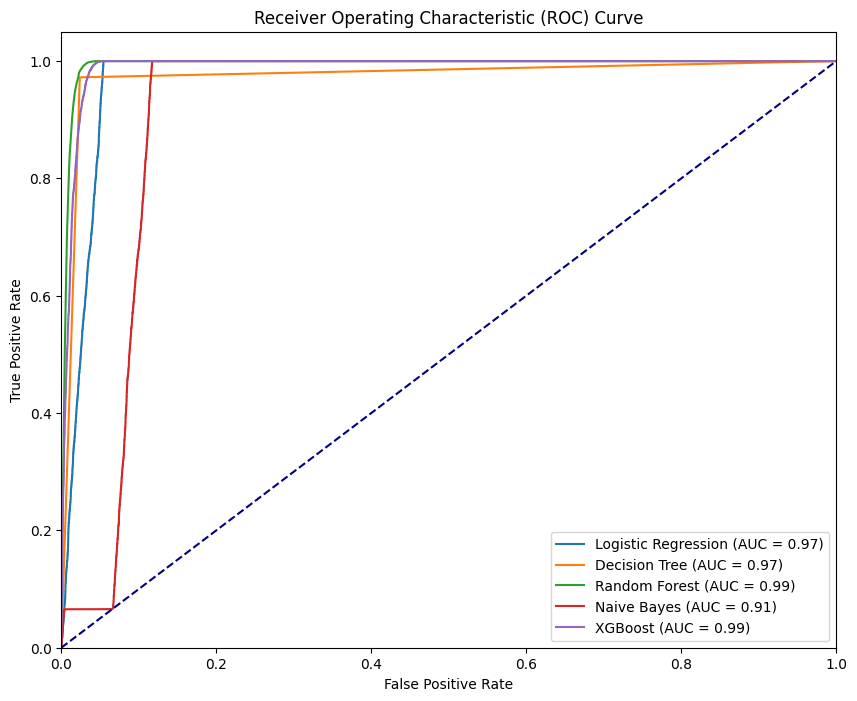

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(10, 8)) # Plotting ROC curve for each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.decision_function(X_test)  
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* The ROC curve helps evaluate the performance of a binary classifier across various decision thresholds.

## ENCODING
Encoding is the technique of converting categorical data into numerical format so that they can be fitted by machine learning models which only take numerical data.
* I used two encoding methods for converting categorical attributes to numerical attributes. One hot encoding for attributes that has less than 8 unique values, and label encoding for attributes that has more than 8 unique values.
- One Hot Encoding : This method encodes categorical features as one-hot numeric array. Basicly, it creates a binary column for each category of the feature. 
- Label Encoding : Label encoder encodes the target feature between 0 and number-of-classes minus 1. 

In [57]:
unique_categorical= df.select_dtypes(include="category").nunique().sort_values()
unique_categorical

Customer Segment       3
Type                   4
Delivery Status        4
Shipping Mode          4
Market                 5
Order Status           9
Department Name       11
Order Region          23
Category Name         50
Product Name         118
Order Country        164
Customer City        563
Order State         1089
Order City          3597
dtype: int64

In [58]:
dummydf= pd.get_dummies(df[list(unique_categorical.to_dict().keys())[:5]])
dummydf.head(3)

,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False


In [59]:
dummydf.shape

(180519, 20)

In [67]:
numdf

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Zipcode,Product Price,ship_year,ship_month,ship_day,ship_hour,order_year,order_month,order_day,order_hour
0,3,4,0,18.251453,-66.037056,13.110000,0.04,0.29,1,314.640015,91.250000,0.0,327.750000,2018,2,3,22,2018,1,31,22
1,5,4,1,18.279451,-66.037064,16.389999,0.05,-0.77,1,311.359985,-139.259995,0.0,327.750000,2018,1,18,12,2018,1,13,12
2,4,4,0,37.292233,-121.881279,18.030001,0.06,-0.77,1,309.720001,-139.259995,0.0,327.750000,2018,1,17,12,2018,1,13,12
3,3,4,0,34.125946,-118.291016,22.940001,0.07,0.08,1,304.809998,22.860001,0.0,327.750000,2018,1,16,11,2018,1,13,11
4,2,4,0,18.253769,-66.037048,29.500000,0.09,0.45,1,298.250000,132.289993,0.0,327.750000,2018,1,15,11,2018,1,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,0,40.640930,-73.942711,0.000000,0.00,0.10,1,399.980011,40.000000,0.0,399.980011,2016,1,20,3,2016,1,16,3
180515,3,2,1,35.362545,-119.018700,4.000000,0.01,-0.77,1,395.980011,-139.259995,0.0,399.980011,2016,1,19,1,2016,1,16,1
180516,5,4,1,41.629959,-72.967155,8.000000,0.02,0.36,1,391.980011,132.289993,0.0,399.980011,2016,1,20,21,2016,1,15,21
180517,3,4,0,18.213350,-66.370575,12.000000,0.03,0.48,1,387.980011,132.289993,0.0,399.980011,2016,1,18,20,2016,1,15,20


In [60]:
df1= pd.concat([numdf, dummydf], axis =1)

In [66]:
df1

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Order Zipcode,Product Price,ship_year,ship_month,ship_day,ship_hour,order_year,order_month,order_day,order_hour,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,3,4,0,18.251453,-66.037056,13.110000,0.04,0.29,1,314.640015,91.250000,0.0,327.750000,2018,2,3,22,2018,1,31,22,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
1,5,4,1,18.279451,-66.037064,16.389999,0.05,-0.77,1,311.359985,-139.259995,0.0,327.750000,2018,1,18,12,2018,1,13,12,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,4,4,0,37.292233,-121.881279,18.030001,0.06,-0.77,1,309.720001,-139.259995,0.0,327.750000,2018,1,17,12,2018,1,13,12,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
3,3,4,0,34.125946,-118.291016,22.940001,0.07,0.08,1,304.809998,22.860001,0.0,327.750000,2018,1,16,11,2018,1,13,11,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
4,2,4,0,18.253769,-66.037048,29.500000,0.09,0.45,1,298.250000,132.289993,0.0,327.750000,2018,1,15,11,2018,1,13,11,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,0,40.640930,-73.942711,0.000000,0.00,0.10,1,399.980011,40.000000,0.0,399.980011,2016,1,20,3,2016,1,16,3,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False
180515,3,2,1,35.362545,-119.018700,4.000000,0.01,-0.77,1,395.980011,-139.259995,0.0,399.980011,2016,1,19,1,2016,1,16,1,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
180516,5,4,1,41.629959,-72.967155,8.000000,0.02,0.36,1,391.980011,132.289993,0.0,399.980011,2016,1,20,21,2016,1,15,21,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
180517,3,4,0,18.213350,-66.370575,12.000000,0.03,0.48,1,387.980011,132.289993,0.0,399.980011,2016,1,18,20,2016,1,15,20,True,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False


In [62]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x.astype(str))
    return x

In [63]:
label= list(unique_categorical.to_dict().keys())[5:]
labeldf=df[label].apply(Labelencoder_feature)

In [64]:
labeldf.head()

,Order Status,Department Name,Order Region,Category Name,Product Name,Order Country,Customer City,Order State,Order City
0,2,4,15,40,78,70,66,475,331
1,5,4,13,40,78,69,66,841,391
2,1,4,13,40,78,69,452,841,391
3,2,4,11,40,78,8,285,835,3226
4,6,4,11,40,78,8,66,835,3226


In [65]:
df2= pd.concat([df1, labeldf], axis =1)

In [73]:
corr_matrix1 = df2.corr()

unique_corr_pairs1 = corr_matrix.mask(np.triu(np.ones(corr_matrix.shape)).astype(bool)).unstack() # Flattening the upper triangle of the correlation matrix to get unique pairs

unique_corr_pairs.sort_values(ascending=False).head(10)

Late_delivery_risk             Delivery Status_Late delivery    1.000000
ship_year                      order_year                       0.994073
ship_month                     order_month                      0.952179
Days for shipment (scheduled)  Shipping Mode_Standard Class     0.945696
ship_hour                      order_hour                       0.918932
Order Item Profit Ratio        Order Profit Per Order           0.879977
Order Zipcode                  Market_USCA                      0.850654
Order Item Discount            Order Item Discount Rate         0.723052
Order Item Total               Product Price                    0.710633
Days for shipping (real)       Days for shipment (scheduled)    0.515880
dtype: float64

In [74]:
drop_corr1 = unique_corr_pairs1[unique_corr_pairs1 > 0.85].index.get_level_values(1).tolist()# Find highly correlated features
drop_corr1

['Shipping Mode_Standard Class',
 'Delivery Status_Late delivery',
 'Order Profit Per Order',
 'Market_USCA',
 'order_year',
 'order_month',
 'order_hour']

In [75]:
df2.drop(drop_corr1, axis=1, inplace=True)

In [76]:
df2.shape

(180519, 43)

## Machine Learning Models with Encoded Dataset

#### Classification Models with Encoded Dataset

In [77]:
df2.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Late_delivery_risk', 'Latitude', 'Longitude', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Order Item Total', 'Order Zipcode',
       'Product Price', 'ship_year', 'ship_month', 'ship_day', 'ship_hour',
       'order_day', 'Customer Segment_Consumer', 'Customer Segment_Corporate',
       'Customer Segment_Home Office', 'Type_CASH', 'Type_DEBIT',
       'Type_PAYMENT', 'Type_TRANSFER', 'Delivery Status_Advance shipping',
       'Delivery Status_Shipping canceled', 'Delivery Status_Shipping on time',
       'Shipping Mode_First Class', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Market_Africa', 'Market_Europe',
       'Market_LATAM', 'Market_Pacific Asia', 'Order Status',
       'Department Name', 'Order Region', 'Category Name', 'Product Name',
       'Order Country', 'Customer City', 'Order State', 'Order City'],
      dt

In [81]:
X= df2.drop(["Late_delivery_risk"], axis= 1)
X = X.loc[:, ~X.columns.str.startswith('Delivery')]
y= df2["Late_delivery_risk"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [83]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(), # Initializing models
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),  
    "XGBoost": XGBClassifier()     
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train) # Train each model
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:\n{report}\n")

Training Logistic Regression...
Accuracy of Logistic Regression: 0.97
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     20396
           1       0.97      0.99      0.98     24734

    accuracy                           0.97     45130
   macro avg       0.98      0.97      0.97     45130
weighted avg       0.98      0.97      0.97     45130


Training Decision Tree...
Accuracy of Decision Tree: 1.00
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20396
           1       1.00      1.00      1.00     24734

    accuracy                           1.00     45130
   macro avg       1.00      1.00      1.00     45130
weighted avg       1.00      1.00      1.00     45130


Training Random Forest...
Accuracy of Random Forest: 1.00
Classification Report of Random Forest:
              precision    recal

In [5]:
num2 = {'Model': ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
       'Score': [0.79, 0.97, 1.0, 1.0, 1.0]}
pd.DataFrame(num2)

,Model,Score
0,Naive Bayes,0.79
1,Logistic Regression,0.97
2,Decision Tree,1.00
3,Random Forest,1.00
4,XGBoost,1.00


Training and evaluating Logistic Regression...
Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating Naive Bayes...
Training and evaluating XGBoost...


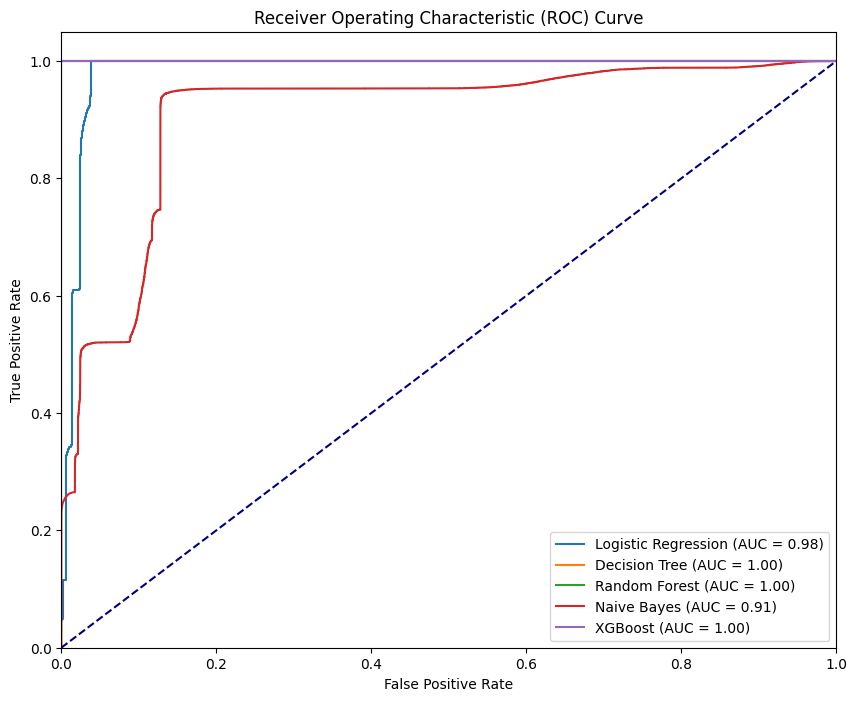

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(10, 8)) # Plotting ROC curve for each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* The ROC curve helps evaluate the performance of a binary classifier across various decision thresholds.

- Decision Tree and Random Forest classifiers both achieved perfect accuracy (1.00), but they might be prone to overfitting.
- Logistic Regression also performed very well with an accuracy of 0.97, and it's known for its interpretability and computational efficiency.
- XGBoost also achieved perfect accuracy and is known for its robustness and performance.

- Based on these considerations, Logistic Regression is be a good choice while prioritize interpretability and computational efficiency and for maximum predictive performance, we can consider using XGBoost.